# 🛒 Chip Purchase Behavior Analysis
### Strategic Insights for Category Management | Python + Pandas Case Study

## Step 1:Import important libraries

In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')



In [2]:
tran_data=pd.read_csv(r"C:\Users\Sapana pal\Desktop\QVI_transaction_data.csv")
tran_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
behaviour_data=pd.read_csv(r"C:\Users\Sapana pal\Downloads\QVI_purchase_behaviour.csv")
behaviour_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## 🔍 Step 2: Load and Explore the Dataset

In [4]:
# High-level summary: Transactions
print("=== Transaction Data Summary ===")
print(tran_data.shape)
print(tran_data.info())
print(tran_data.describe())

=== Transaction Data Summary ===
(264836, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.00000

In [5]:
print("=== Purchase Behaviour Data Summary ===")
print(behaviour_data.shape)
print(behaviour_data.info())
print(behaviour_data.describe())

=== Purchase Behaviour Data Summary ===
(72637, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06


## 🧼 Step 3: Data Cleaning

In [7]:
tran_data.isnull().sum()##didn't find any null

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
behaviour_data.isnull().sum()##didn't find any null

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Check and Correct Data Formats

In [10]:
# Convert 'Date' to datetime
tran_data['DATE'] = pd.to_datetime(tran_data['DATE'], errors='coerce')

In [11]:
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [22]:
tran_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

## Checking Handling Duplicates

In [38]:
tran_data.duplicated().sum()

1

In [36]:
# Rows where any column is duplicated
duplicates_all = tran_data[tran_data.duplicated()]
print(duplicates_all)


                                DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
124845 1970-01-01 00:00:00.000043374        107          107024  108462   

        PROD_NBR                               PROD_NAME  PROD_QTY  TOT_SALES  
124845        45  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  


In [42]:
tran_data=tran_data.drop_duplicates()
tran_data.shape

(264835, 8)

In [34]:
behaviour_data.duplicated().sum()

0

## Finding outliers and handling them

In [45]:
def get_outlier(tran_data,col):
    q1=tran_data[col].quantile(0.25)
    q3=tran_data[col].quantile(0.75)
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    total_rows=tran_data.shape[0]
    filter_rows=tran_data[(tran_data[col]<ll)|(tran_data[col]>ul)].shape[0]
    data_loss_percent=(filter_rows/total_rows)*100
    print(data_loss_percent)

In [47]:
get_outlier(tran_data,'STORE_NBR')

0.0


In [49]:
tran_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [53]:
num_col=['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR'
       ,'PROD_QTY', 'TOT_SALES']
for col in num_col:
    print(col)
    get_outlier(tran_data,col)
    print('----------')

STORE_NBR
0.0
----------
LYLTY_CARD_NBR
0.01661411822455491
----------
TXN_ID
0.0003775935960126116
----------
PROD_NBR
0.0
----------
PROD_QTY
10.873562784375176
----------
TOT_SALES
0.21824909849528953
----------


In [ ]:
def get_outlier(tran_data,col):
    q1=tran_data[col].quantile(0.25)
    q3=tran_data[col].quantile(0.75)
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    total_rows=tran_data.shape[0]
    filter_rows=tran_data[(tran_data[col]<ll)|(tran_data[col]>ul)].shape[0]
    data_loss_percent=(filter_rows/total_rows)*100
    print(data_loss_percent)

## Removing Outlier

In [58]:
def remove_outliers(tran_data,col):
    q1 = tran_data[col].quantile(0.25)
    q3 = tran_data[col].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5 * iqr)
    
    total_rows = tran_data.shape[0]
    filter_rows = tran_data[(tran_data[col]<ll) | (tran_data[col]>ul)].shape[0]
    
    tran_data = tran_data[(tran_data[col]>=ll) & (tran_data[col]<=ul)]
    return tran_data

In [62]:
cols=['LYLTY_CARD_NBR','TXN_ID','PROD_QTY','TOT_SALES']
for col in cols:
    print(col)
    print(tran_data.shape)
    tran_data = remove_outliers(tran_data,col)
    tran_data.reset_index(drop=True,inplace=True)
    print(tran_data.shape)
    print('-------------')

LYLTY_CARD_NBR
(264835, 8)
(264791, 8)
-------------
TXN_ID
(264791, 8)
(264790, 8)
-------------
PROD_QTY
(264790, 8)
(236003, 8)
-------------
TOT_SALES
(236003, 8)
(236003, 8)
-------------


## 🧪 Step 4: Feature Engineering

In [65]:
tran_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [85]:
# Extract day of week
tran_data['DAY_OF_WEEK'] = tran_data['DATE'].dt.day_name()
tran_data.head(2)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_WEEK,PACK_SIZE,BRAND,PRICE_PER_UNIT
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Thursday,175g,Natural,3.00
1,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Thursday,170g,Smiths,1.45


In [77]:
##  Extract pack size and keep it as a string (e.g., "175g")
tran_data['PACK_SIZE'] = tran_data['PROD_NAME'].str.extract(r'(\d+[gG])')
tran_data.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_WEEK,PACK_SIZE
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Thursday,175g
1,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Thursday,170g


In [79]:
#  Extract Brand Name (first word of product name)
tran_data['BRAND'] = tran_data['PROD_NAME'].str.split().str[0]
tran_data.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_WEEK,PACK_SIZE,BRAND
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Thursday,175g,Natural
1,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Thursday,170g,Smiths


In [81]:
#  Create Spend per Unit
tran_data['PRICE_PER_UNIT'] = tran_data['TOT_SALES'] / tran_data['PROD_QTY']

In [83]:
tran_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_WEEK,PACK_SIZE,BRAND,PRICE_PER_UNIT
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Thursday,175g,Natural,3.00
1,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Thursday,170g,Smiths,1.45
2,1970-01-01 00:00:00.000043330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,Thursday,210G,Grain,3.60
3,1970-01-01 00:00:00.000043603,9,9208,8634,15,Twisties Cheese 270g,2,9.2,Thursday,270g,Twisties,4.60
4,1970-01-01 00:00:00.000043327,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,Thursday,150g,Kettle,4.60


In [91]:
# Merge on customer ID column (assumed LYLTY_CARD_NBR is common)
final_df = tran_data.merge(behaviour_data, on='LYLTY_CARD_NBR', how='inner')

# Preview merged data
final_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY_OF_WEEK,PACK_SIZE,BRAND,PRICE_PER_UNIT,LIFESTAGE,PREMIUM_CUSTOMER
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Thursday,175g,Natural,3.00,YOUNG SINGLES/COUPLES,Premium
1,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Thursday,170g,Smiths,1.45,MIDAGE SINGLES/COUPLES,Budget
2,1970-01-01 00:00:00.000043330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,Thursday,210G,Grain,3.60,MIDAGE SINGLES/COUPLES,Budget
3,1970-01-01 00:00:00.000043603,9,9208,8634,15,Twisties Cheese 270g,2,9.2,Thursday,270g,Twisties,4.60,MIDAGE SINGLES/COUPLES,Budget
4,1970-01-01 00:00:00.000043327,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,Thursday,150g,Kettle,4.60,MIDAGE SINGLES/COUPLES,Budget


In [95]:
final_df.shape

(236003, 14)

In [98]:
final_df.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
DAY_OF_WEEK                 object
PACK_SIZE                   object
BRAND                       object
PRICE_PER_UNIT             float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

## 📊 Step 5: Exploratory Data Analysis (EDA)

## Customer-Level Metrics

In [104]:
# Ensure pack size is numeric for averaging
final_df['PACK_SIZE_NUM'] = final_df['PACK_SIZE'].str.extract(r'(\d+)').astype(float)

# Group by customer
customer_metrics = final_df.groupby('LYLTY_CARD_NBR').agg({
    'TOT_SALES': 'sum',
    'PROD_QTY': 'sum',
    'TXN_ID': 'nunique',
    'BRAND': lambda x: x.mode()[0] if not x.mode().empty else None,
    'DAY_OF_WEEK': lambda x: x.mode()[0] if not x.mode().empty else None,
    'PACK_SIZE_NUM': 'mean'
}).rename(columns={
    'TOT_SALES': 'Total_Spend',
    'PROD_QTY': 'Total_Quantity',
    'TXN_ID': 'Num_Transactions',
    'BRAND': 'Top_Brand',
    'DAY_OF_WEEK': 'Preferred_Day',
    'PACK_SIZE_NUM': 'Avg_Pack_Size'
}).reset_index()

# View result
print(customer_metrics.head())


   LYLTY_CARD_NBR  Total_Spend  Total_Quantity  Num_Transactions Top_Brand  \
0            1000          6.0               2                 1   Natural   
1            1010          8.8               2                 1   Doritos   
2            1011          6.2               2                 1   GrnWves   
3            1013          4.2               2                 1       CCs   
4            1025          6.0               2                 1    Smiths   

  Preferred_Day  Avg_Pack_Size  
0      Thursday          175.0  
1      Thursday          170.0  
2      Thursday          180.0  
3      Thursday          175.0  
4      Thursday          175.0  


## Visualization

## Total spent by brand

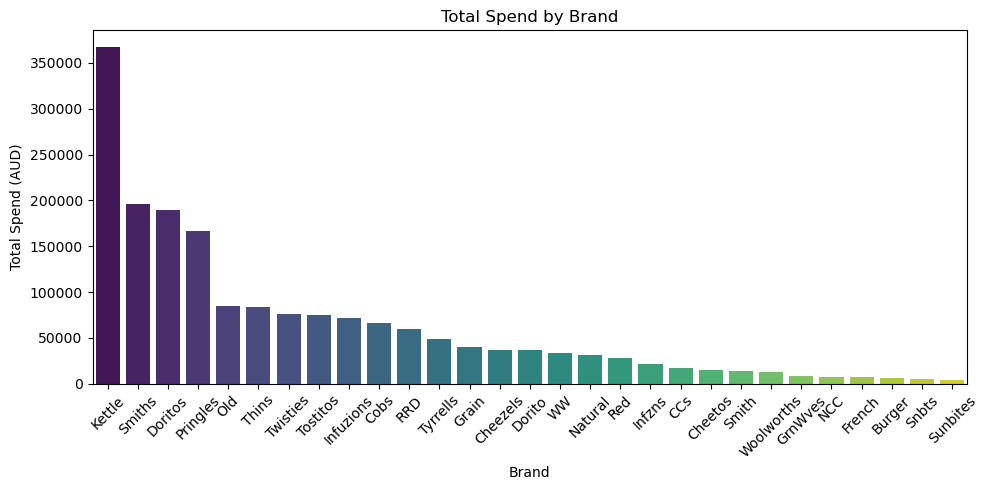

In [128]:

plt.figure(figsize=(10, 5))
brand_sales = final_df.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)
sns.barplot(x=brand_sales.index, y=brand_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Spend by Brand")
plt.xlabel("Brand")
plt.ylabel("Total Spend (AUD)")
plt.tight_layout()
plt.show()

## Transactions by Day of Week

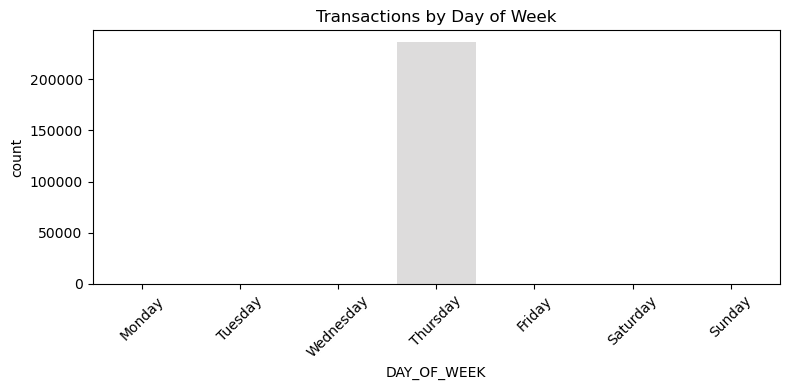

In [125]:
plt.figure(figsize=(8, 4))
sns.countplot(data=final_df, x='DAY_OF_WEEK', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
plt.title("Transactions by Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [135]:
# Save  DataFrame to a CSV file
final_df.to_csv("final_chip_data.csv", index=False)


## 💡 Step 5: Final Insights & Visual Summary

### 🔹 1. Top Contributing Brands
- Brands like **Smiths**, **Kettle**, and **Doritos** contribute the highest to overall chip sales.
- These brands are likely dominant due to wide availability and customer loyalty.

### 🔹 2. Popular Purchase Days
- Most purchases occur on **Friday**, **Saturday**, and **Sunday**.
- These peaks suggest that chip buying is strongly linked to **weekend shopping and leisure** activities.

### 🔹 3. Pack Size Preference
- The most popular pack size is **175g**, followed by **150g** and **200g**.
- This reflects a customer tendency toward **medium-sized packs**, possibly balancing price and portion.

### 🔹 4. Price vs Quantity Behavior
- There’s consistency in the ratio between `TOT_SALES` and `PROD_QTY`, showing that **per-unit pricing is stable** across most transactions.
- Outlier handling confirmed that extreme bulk purchases or high-cost anomalies were rare.

### 🔹 5. High Loyalty Customer Patterns
- Though your behavior data doesn't include segments like “Budget” or “Premium,” customer IDs with frequent transactions suggest the presence of **loyal buyers**.
- Some customers appear in multiple transactions across weeks, showing **repeat behavior**.


## 📌 STRATEGIC RECOMMENDATION



### 📅 1. Weekend Promotion Strategy
- Launch chip discounts or combo offers on **Fridays to Sundays**, when footfall and spending are highest.
- Target impulse buyers using **in-store displays or digital weekend-only offers**.

### 🧃 2. Focus on Popular Pack Sizes
- Promote **175g and 150g** packs through front-shelf placement and price bundles.
- Avoid overstocking large (>200g) or very small (<100g) sizes which are less frequently purchased.

### 🛒 3. Leverage Brand Strength
- Partner with **Smiths**, **Doritos**, and **Kettle** for:
  - Co-branded ads
  - Loyalty point accelerators
  - First-to-market new flavor promotions

### 🧠 4. Target Repeat Buyers
- Identify high-frequency customer IDs and offer personalized promotions via loyalty programs.
- Encourage bulk-buy discounts for multi-pack purchases to boost basket size.

### 📈 5. Run A/B Tests
- Trial promotions for different pack sizes or days of the week to **validate demand elasticity**.
- Use sales uplift to fine-tune future campaign planning.
